Step 1: Understand the Problem and Data

This dataset is commonly used for Multiple Linear Regression practice, where the goal is to predict a startup's profit based on several independent variables like R&D spending, Administration costs, Marketing expenses, and the startup's location.


Dataset Overview

The dataset typically includes the following columns:


Column Name	Description

* R&D Spend	Amount spent on Research & Development (Continuous numerical value)
* Administration	Administrative expenses (Continuous numerical value)
* Marketing Spend	Amount spent on Marketing (Continuous numerical value)
* State	Location of the startup (Categorical: e.g., "California," "New York," "Florida")
* Profit	The target variable—the profit earned by the startup (Continuous numerical value)

##Step 2: Load and Explore the Data

In [1]:
# Importing Necessary Libraries
import pandas as pd # Data Manipulation
import numpy as np  # Numerical Computations
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical Graphics

In [2]:
df = pd.read_csv('50_Startups.csv') # Reading the data from the CSV file named '50_Startups.csv' and stores it in a pandas DataFrame named df.

In [3]:
df.head() # Displays the first 5 rows of the DataFrame df, allowing you to quickly inspect the data.

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.isnull().sum() # Calculates and displays the number of missing (null) values in each column of the DataFrame df.

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [5]:
df.info() # Prints a concise summary of the DataFrame df, including data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
ui = df['State'].unique()

In [7]:
ui

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
df.describe() # Generates descriptive statistics of the DataFrame's numerical columns, like mean, standard deviation, and quartiles.

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df.duplicated().sum() # Returns a boolean Series indicating whether each row in the DataFrame df is a duplicate of a previous row.

np.int64(0)

In [10]:
# Convert new categorical features
df = pd.get_dummies(df, columns=['State'])


In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


##Step 4: Exploratory Data Analysis (EDA)

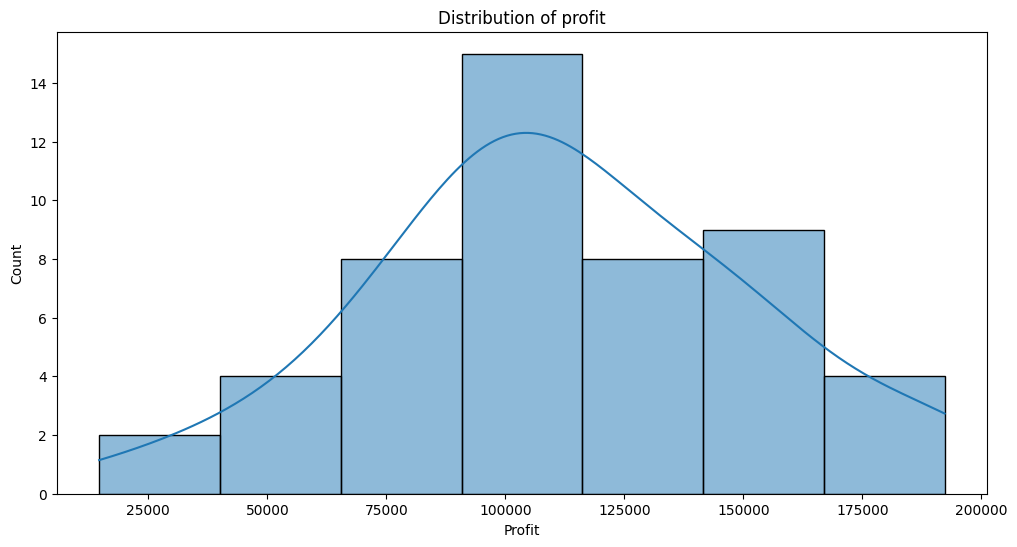

In [14]:
# Visualize Distribution
plt.figure(figsize=(12,6))
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of profit')
plt.show()

* X-axis: Represents the profit values.
* Y-axis: Shows how frequently each profit value (or range of values) occurs.
* Bars: Each bar represents a range of profit values.
* Height of bars: The taller a bar, the more startups have profits within that range.
* Overall Shape: The overall shape of the histogram tells us about the distribution of profit.

* Most startups have profits clustered around the middle (the highest bar).

* Fewer startups have very low or very high profits (the shorter bars on the sides).

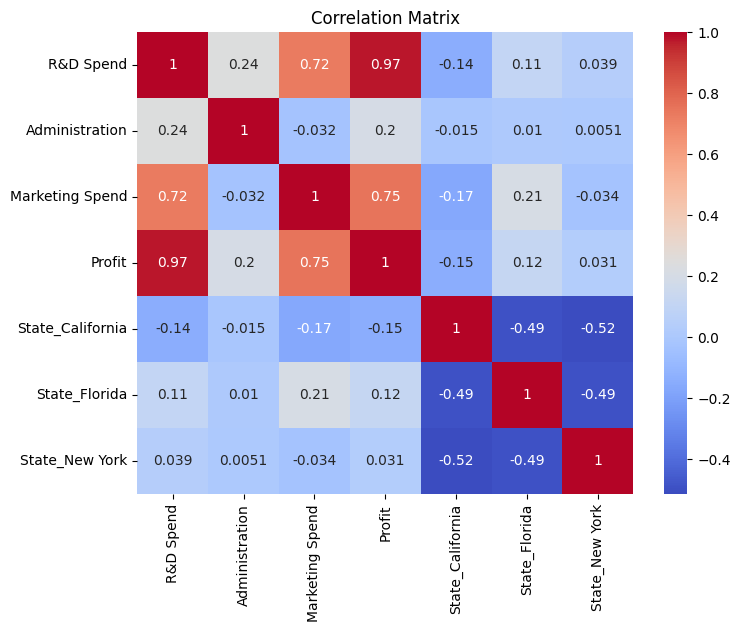

In [16]:
# Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

How to interpret the values

* 1: A perfect positive correlation. This means that as one variable increases, the other variable increases proportionally.
* 0: No linear correlation. This means that there is no relationship between the variables.
* -1: A perfect negative correlation. This means that as one variable increases, the other variable decreases proportionally.
* Values between -1 and 1: Indicate the strength and direction of the correlation. Values closer to 1 or -1 indicate a stronger correlation. Values closer to 0 indicate a weaker correlation.

* Strong positive correlation: R&D Spend and Profit are strongly positively correlated, meaning higher R&D spending is generally associated with higher profit.
* Moderate positive correlation: Marketing Spend has a moderate positive correlation with Profit.
* Weak or no correlation: Administration and Profit show little to no correlation. The same is true for State dummy variables and Profit.

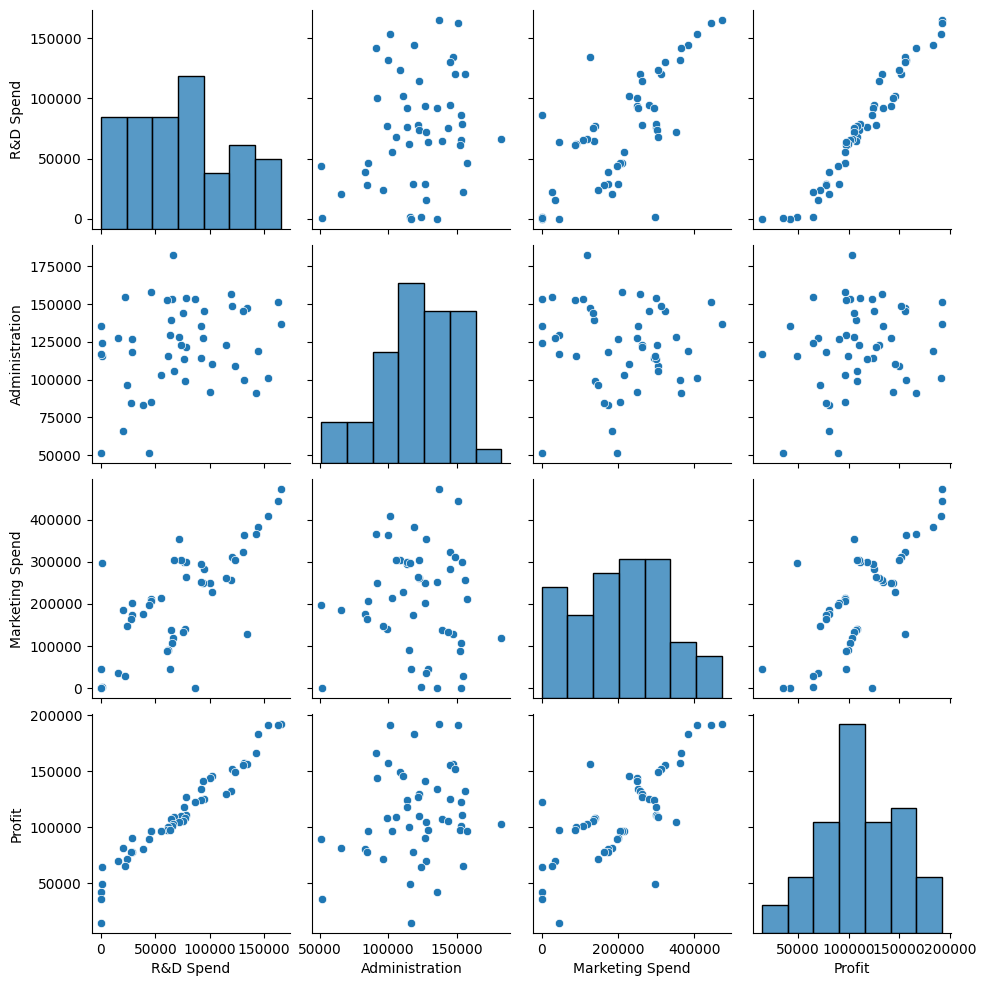

In [17]:
# Pair Plot for Numeric Variables
sns.pairplot(df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])
plt.show()

##Step 5: Prepare Data for Modeling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Defining feature and target
X = df.drop('Profit', axis=1)
y = df['Profit']

In [21]:
# Split the data
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [23]:
# Scale numberical features
scaler = StandardScaler()
cols = ['R&D Spend', 'Administration', 'Marketing Spend']
x_train[cols] = scaler.fit_transform(x_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

##Step 6: Build and Train the Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [28]:
# Initilize and train model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [29]:
# Making Predictions
y_pred = lr.predict(X_test)

## Step 7 Model Evaluation

In [31]:
# calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Erro:{mae:.2f}")
print(f"R-Squared:{r2:.2f}")

Mean Squared Error: 102911562.71
Root Mean Squared Error: 10144.53
Mean Absolute Erro:8121.44
R-Squared:0.96


* Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. It gives higher weight to larger errors.

* Root Mean Squared Error (RMSE): The square root of MSE, providing a more interpretable metric in the original units of the target variable (medical charges).

* Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values. It treats all errors equally.

* R-squared: Represents the proportion of variance in the target variable (medical charges) explained by the model. It indicates how well the model fits the data, with higher values indicating a better fit.

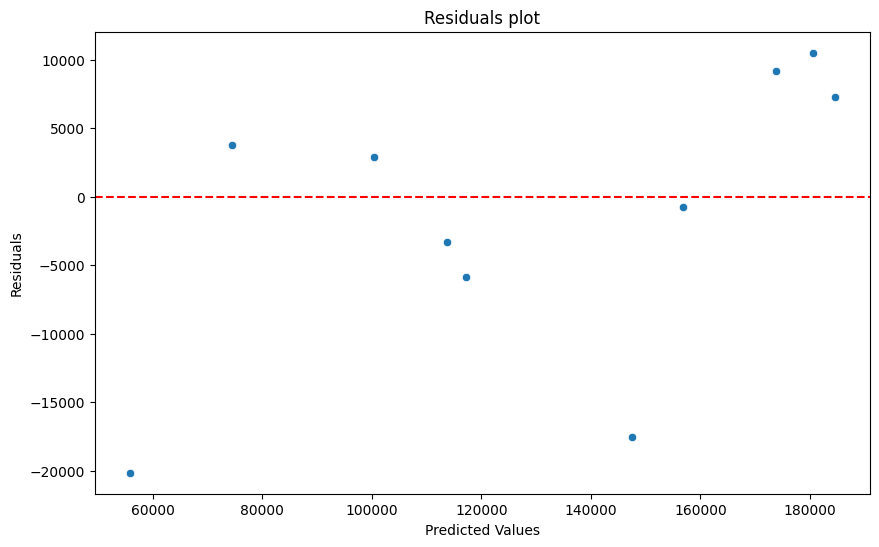

In [34]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.show()

The residual plot should ideally show a random scatter of points around the horizontal line at 0, indicating a good model fit. Look for:

* Randomness: Points should be scattered without any clear patterns.
* Constant Variance: The spread of points should be roughly consistent across predicted values.
* No Outliers: Avoid points far away from the others.

If these conditions are met, your linear regression model is likely a good fit for the data.